# Importing Files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

path_2021 = '/content/drive/MyDrive/college_reviews/collegereview2021.csv'
path_2022 = '/content/drive/MyDrive/college_reviews/collegereview2022.csv'
path_2023 = '/content/drive/MyDrive/college_reviews/collegereview2023.csv'

df_2021 = pd.read_csv(path_2021)
df_2022 = pd.read_csv(path_2022)
df_2023 = pd.read_csv(path_2023, encoding='utf-8', engine='python', on_bad_lines='skip')

df_2021['year'] = 2021
df_2022['year'] = 2022
df_2023['year'] = 2023

In [ ]:
print(df_2021.head())

   Unnamed: 0               Name  \
0           0           Nimalraj   
1           1  Priyaranjan kumar   
2           2       Aftab Shaikh   
3           3        Shreya sneh   
4           4      Yuv Raj Singh   

                                             college  \
0                SNS College of Technology - [SNSCT]   
1           Bhagalpur College of Engineering - [BCE]   
2  Shree LR Tiwari College of Engineering - [SLRTCE]   
3                                    IILM University   
4                        Galgotias University - [GU]   

                                              review  rating  year  
0  The annual fee for the course is 1,25,000. Now...     6.0  2021  
1  The hostel life and social life in this colleg...     9.7  2021  
2  I chose this course because I was interested i...     8.0  2021  
3  There is IGNITE fest in the university held on...    10.0  2021  
4  The civil department is very good in this coll...     6.2  2021  


# EDA

In [ ]:
print("2021 Data:")
print(df_2021.info(), "\n")
print("2022 Data:")
print(df_2022.info(), "\n")
print("2023 Data:")
print(df_2023.info(), "\n")

2021 Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18298 entries, 0 to 18297
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  18298 non-null  int64  
 1   Name        18298 non-null  object 
 2   college     18298 non-null  object 
 3   review      18298 non-null  object 
 4   rating      18298 non-null  float64
 5   year        18298 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 857.8+ KB
None 

2022 Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9778 entries, 0 to 9777
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  9778 non-null   object 
 1   Name        9721 non-null   object 
 2   college     9697 non-null   object 
 3   review      9697 non-null   object 
 4   rating      9673 non-null   float64
 5   year        9778 non-null   int64  
dtypes: float64(1), int64(1), object(

In [ ]:
print("2021:\n", df_2021.isnull().sum())
print("2022:\n", df_2022.isnull().sum())
print("2023:\n", df_2023.isnull().sum())

2021:
 Unnamed: 0    0
Name          0
college       0
review        0
rating        0
year          0
dtype: int64
2022:
 Unnamed: 0      0
Name           57
college        81
review         81
rating        105
year            0
dtype: int64
2023:
 Unnamed: 0      0
Name           54
college        81
review         81
rating        108
year            0
dtype: int64


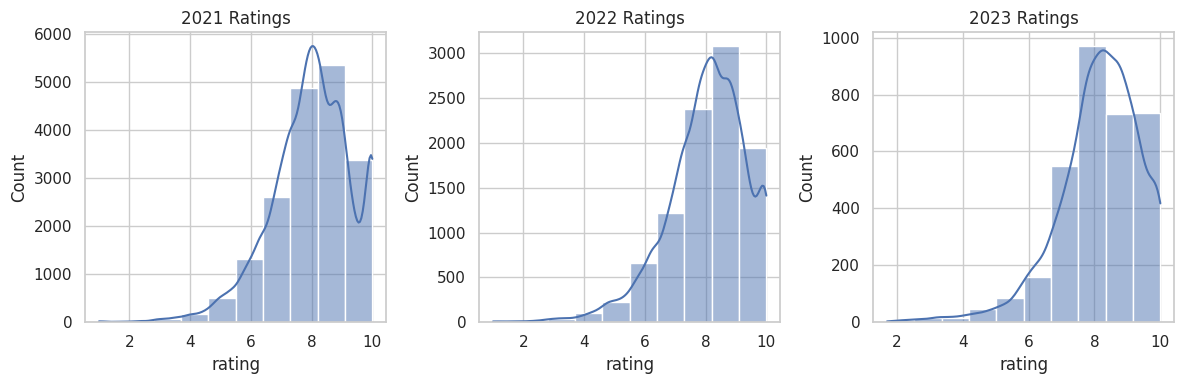

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.histplot(df_2021['rating'], bins=10, kde=True)
plt.title('2021 Ratings')

plt.subplot(1, 3, 2)
sns.histplot(df_2022['rating'], bins=10, kde=True)
plt.title('2022 Ratings')

plt.subplot(1, 3, 3)
if 'rating' in df_2023.columns:
    sns.histplot(df_2023['rating'], bins=10, kde=True)
    plt.title('2023 Ratings')
else:
    plt.text(0.5, 0.5, 'No rating column in 2023', ha='center', va='center')
    plt.axis('off')

plt.tight_layout()
plt.show()

# Preprocessing

Handle missing values

In [ ]:
def clean_review_data(df):
    df=df.drop(columns=["Unnamed: 0", "Name"], errors='ignore')

    df["rating"] = pd.to_numeric(df["rating"], errors="coerce")
    df["review"] = df["review"].astype(str)

    df["college"] = df["college"].fillna("Unknown College")
    df["rating"] = df["rating"].fillna(df["rating"].median())

    df = df[df['review'].notna() & (df['review'].str.strip() != '')]
    df = df.reset_index(drop=True)

    return df

In [ ]:
df_2021 = clean_review_data(df_2021)
df_2022 = clean_review_data(df_2022)
df_2023 = clean_review_data(df_2023)

In [ ]:
print(df_2021.head())
print(df_2021.info())

print(df_2021.isnull().sum())
print(df_2022.isnull().sum())
print(df_2023.isnull().sum())

                                             college  \
0                SNS College of Technology - [SNSCT]   
1           Bhagalpur College of Engineering - [BCE]   
2  Shree LR Tiwari College of Engineering - [SLRTCE]   
3                                    IILM University   
4                        Galgotias University - [GU]   

                                              review  rating  year  
0  The annual fee for the course is 1,25,000. Now...     6.0  2021  
1  The hostel life and social life in this colleg...     9.7  2021  
2  I chose this course because I was interested i...     8.0  2021  
3  There is IGNITE fest in the university held on...    10.0  2021  
4  The civil department is very good in this coll...     6.2  2021  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18298 entries, 0 to 18297
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   college  18298 non-null  object 
 1   review   18298 non-nul

In [ ]:
def add_sentiment_labels(df):
    df['sentiment'] = df['rating'].apply(lambda x: -1 if x <= 4 else (0 if x <= 6 else 1))
    return df

In [ ]:
df_2021 = add_sentiment_labels(df_2021)
df_2022 = add_sentiment_labels(df_2022)

In [ ]:
print(df_2021['sentiment'].value_counts())
print(df_2022['sentiment'].value_counts())

sentiment
 1    16712
 0     1392
-1      194
Name: count, dtype: int64
sentiment
 1    9019
 0     656
-1     103
Name: count, dtype: int64


Cleaning Reviews

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')
stop_words = set(stopwords.words("english"))
stemmer = PorterStemmer()

def clean_review(text):

    text = text.lower() #lowercase
    text = re.sub(r"\[.*?\]", "", text)  #remove bracket text
    text = re.sub(r"[^\w\s]", "", text)  #remove punctuation
    text = re.sub(r"\d+", "", text)  #remove numbers
    text = re.sub(r"\s+", " ", text).strip()  #remove extra spaces

    words = text.split()
    filtered_words = [stemmer.stem(word) for word in words if word not in stop_words] #remove stopwords and stemming

    return " ".join(filtered_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df_2021['cleaned_review'] = df_2021['review'].apply(clean_review)
df_2022['cleaned_review'] = df_2022['review'].apply(clean_review)
df_2023['cleaned_review'] = df_2023['review'].apply(clean_review)

In [ ]:
print(df_2021.head())

                                             college  \
0                SNS College of Technology - [SNSCT]   
1           Bhagalpur College of Engineering - [BCE]   
2  Shree LR Tiwari College of Engineering - [SLRTCE]   
3                                    IILM University   
4                        Galgotias University - [GU]   

                                              review  rating  year  sentiment  \
0  The annual fee for the course is 1,25,000. Now...     6.0  2021          0   
1  The hostel life and social life in this colleg...     9.7  2021          1   
2  I chose this course because I was interested i...     8.0  2021          1   
3  There is IGNITE fest in the university held on...    10.0  2021          1   
4  The civil department is very good in this coll...     6.2  2021          1   

                                      cleaned_review  
0  annual fee cours forc pay fee earli total amou...  
1  hostel life social life colleg enjoy almost cl...  
2  chose co

# TF-IDF Vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(ngram_range=(1,2), max_features=2000) #unigram + bigrams

tfidf_matrix_train = tfidf.fit_transform(df_2021['cleaned_review'])
tfidf_df_train = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf.get_feature_names_out())
df_2021["tfidf_score"] = tfidf_df_train.mean(axis=1)

tfidf_matrix_test = tfidf.transform(df_2022['cleaned_review'])  # only transform
tfidf_df_test = pd.DataFrame(tfidf_matrix_test.toarray(), columns=tfidf.get_feature_names_out())
df_2022["tfidf_score"] = tfidf_df_test.mean(axis=1)

tfidf_matrix_2023 = tfidf.transform(df_2023['cleaned_review'])
tfidf_df_2023 = pd.DataFrame(tfidf_matrix_2023.toarray(), columns=tfidf.get_feature_names_out())
df_2023["tfidf_score"] = tfidf_df_2023.mean(axis=1)

In [ ]:
print(df_2021.head())

                                             college  \
0                SNS College of Technology - [SNSCT]   
1           Bhagalpur College of Engineering - [BCE]   
2  Shree LR Tiwari College of Engineering - [SLRTCE]   
3                                    IILM University   
4                        Galgotias University - [GU]   

                                              review  rating  year  sentiment  \
0  The annual fee for the course is 1,25,000. Now...     6.0  2021          0   
1  The hostel life and social life in this colleg...     9.7  2021          1   
2  I chose this course because I was interested i...     8.0  2021          1   
3  There is IGNITE fest in the university held on...    10.0  2021          1   
4  The civil department is very good in this coll...     6.2  2021          1   

                                      cleaned_review  tfidf_score  
0  annual fee cours forc pay fee earli total amou...     0.003213  
1  hostel life social life colleg enjoy 

# SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

X_train = tfidf_df_train
y_train = df_2021['sentiment']

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


print("Before SMOTE:\n", y_train.value_counts())
print("After SMOTE:\n", y_train_resampled.value_counts())


Before SMOTE:
 sentiment
 1    16712
 0     1392
-1      194
Name: count, dtype: int64
After SMOTE:
 sentiment
 0    16712
 1    16712
-1    16712
Name: count, dtype: int64


# Model Training and Evaluation

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": MultinomialNB(),
    "Linear SVM": LinearSVC()
}

results = []

for name, model in models.items():
    print(f"\n{name}")
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(tfidf_df_test)

    acc = accuracy_score(df_2022['sentiment'], y_pred)
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:\n")
    print(classification_report(df_2022['sentiment'], y_pred, digits=4))

    report = classification_report(df_2022['sentiment'], y_pred, output_dict=True)
    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1-Score': report['weighted avg']['f1-score']
    })

comparison_df = pd.DataFrame(results)
print("\n Model Comparison Table")
print(comparison_df.sort_values(by="F1-Score", ascending=False))



Logistic Regression
Accuracy: 0.7727
Classification Report:

              precision    recall  f1-score   support

          -1     0.0942    0.2039    0.1288       103
           0     0.1310    0.3628    0.1925       656
           1     0.9429    0.8090    0.8708      9019

    accuracy                         0.7727      9778
   macro avg     0.3893    0.4585    0.3974      9778
weighted avg     0.8795    0.7727    0.8175      9778


Random Forest
Accuracy: 0.9283
Classification Report:

              precision    recall  f1-score   support

          -1     1.0000    0.1165    0.2087       103
           0     0.7805    0.0976    0.1734       656
           1     0.9295    0.9980    0.9625      9019

    accuracy                         0.9283      9778
   macro avg     0.9033    0.4040    0.4482      9778
weighted avg     0.9202    0.9283    0.9016      9778


Naive Bayes
Accuracy: 0.7464
Classification Report:

              precision    recall  f1-score   support

          -

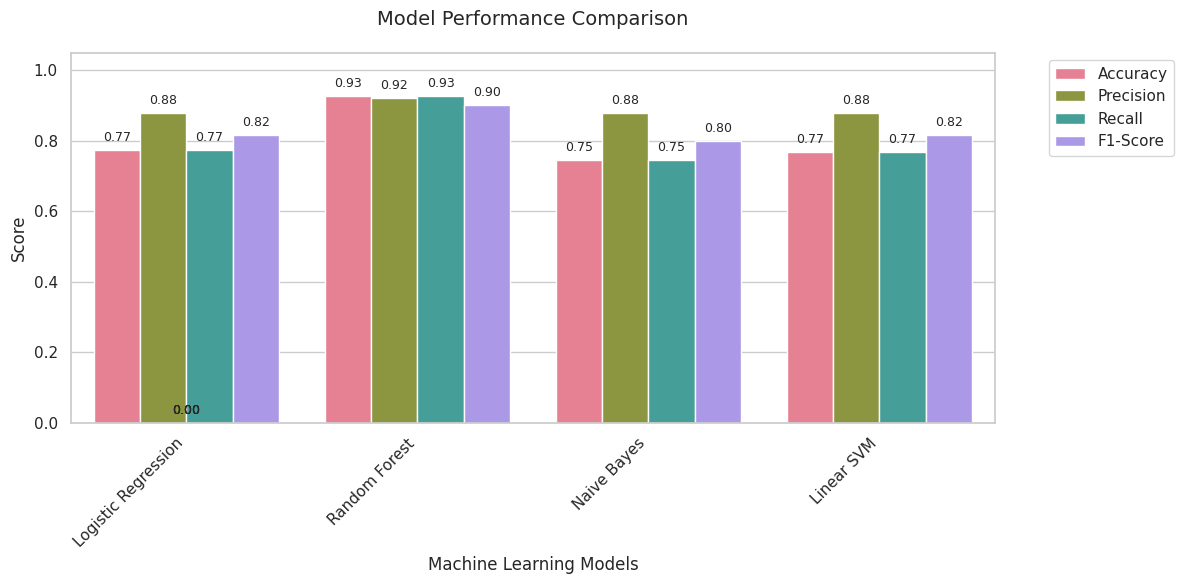

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

metrics_df = comparison_df.melt(id_vars='Model',
                               value_vars=['Accuracy', 'Precision', 'Recall', 'F1-Score'],
                               var_name='Metric',
                               value_name='Value')

plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
palette = sns.color_palette("husl", len(models))

ax = sns.barplot(data=metrics_df, x='Model', y='Value', hue='Metric', palette=palette)

plt.title('Model Performance Comparison', fontsize=14, pad=20)
plt.xlabel('Machine Learning Models', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.ylim(0, 1.05)
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}",
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha='center', va='center',
               xytext=(0, 9),
               textcoords='offset points',
               fontsize=9)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

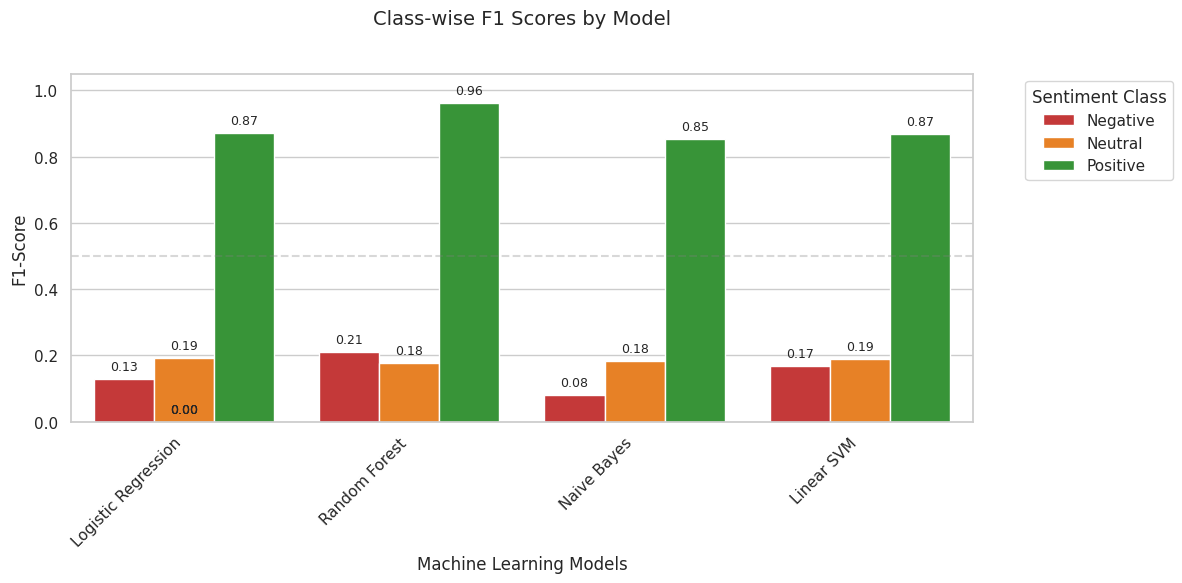

In [ ]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

results = []
class_names = ['-1', '0', '1']
for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(tfidf_df_test)

    report = classification_report(df_2022['sentiment'], y_pred, output_dict=True, digits=4)

    model_results = {
        'Model': name,
        'Accuracy': accuracy_score(df_2022['sentiment'], y_pred),
        'Weighted_Precision': report['weighted avg']['precision'],
        'Weighted_Recall': report['weighted avg']['recall'],
        'Weighted_F1': report['weighted avg']['f1-score']
    }

    for cls in class_names:
        model_results.update({
            f'Precision_{cls}': report[cls]['precision'],
            f'Recall_{cls}': report[cls]['recall'],
            f'F1_{cls}': report[cls]['f1-score'],
            f'Support_{cls}': report[cls]['support']
        })

    results.append(model_results)

comparison_df = pd.DataFrame(results)

plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

plot_df = pd.melt(comparison_df,
                  id_vars=['Model'],
                  value_vars=[f'F1_{cls}' for cls in class_names],
                  var_name='Class',
                  value_name='F1-Score')

plot_df['Class'] = plot_df['Class'].str.replace('F1_', '').map({
    '-1': 'Negative',
    '0': 'Neutral',
    '1': 'Positive'
})

ax = sns.barplot(data=plot_df, x='Model', y='F1-Score', hue='Class',
                 palette=['#d62728', '#ff7f0e', '#2ca02c'],
                 saturation=0.8)

for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points',
                fontsize=9)

plt.title('Class-wise F1 Scores by Model\n',
          fontsize=14, pad=20)
plt.xlabel('Machine Learning Models', fontsize=12)
plt.ylabel('F1-Score', fontsize=12)
plt.ylim(0, 1.05)
plt.legend(title='Sentiment Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')

plt.axhline(y=0.5, color='gray', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

# Hyperparameter Tuning (Logistic Regression)

Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(tfidf_df_test)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [100, 200],
    'class_weight': ['balanced']

}

random_search = RandomizedSearchCV(LogisticRegression(),
                                   param_distributions=param_dist,
                                   n_iter=5,
                                   cv=3,
                                   scoring='accuracy',
                                   verbose=1,
                                   random_state=42)

random_search.fit(X_train_scaled, y_train_resampled)


print("Best Parameters:", random_search.best_params_)
best_log_reg = random_search.best_estimator_


Fitting 3 folds for each of 5 candidates, totalling 15 fits


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best Parameters: {'solver': 'lbfgs', 'max_iter': 100, 'class_weight': 'balanced', 'C': 10}


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


evaluation after tuning

In [ ]:
y_test = df_2022["sentiment"]

y_pred_2022 = best_log_reg.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred_2022))
print("\nClassification Report:\n", classification_report(y_test, y_pred_2022))

Accuracy: 0.7713233790141133

Classification Report:
               precision    recall  f1-score   support

          -1       0.12      0.19      0.15       103
           0       0.12      0.34      0.18       656
           1       0.94      0.81      0.87      9019

    accuracy                           0.77      9778
   macro avg       0.39      0.45      0.40      9778
weighted avg       0.88      0.77      0.82      9778



visualisation

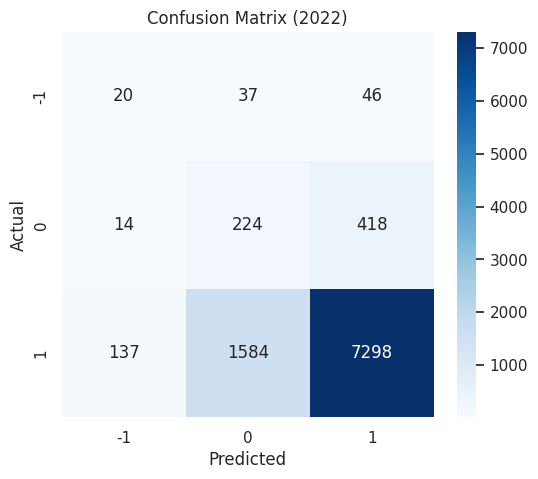

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred_2022, labels=[-1, 0, 1])

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[-1, 0, 1], yticklabels=[-1, 0, 1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (2022)")
plt.show()


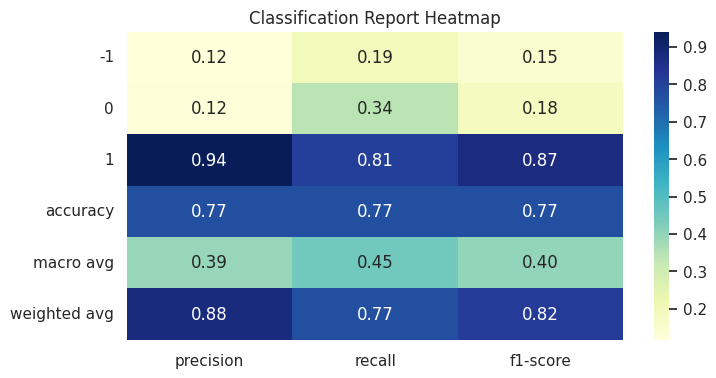

In [ ]:
report = classification_report(y_test, y_pred_2022, output_dict=True)

plt.figure(figsize=(8, 4))
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Classification Report Heatmap")
plt.show()


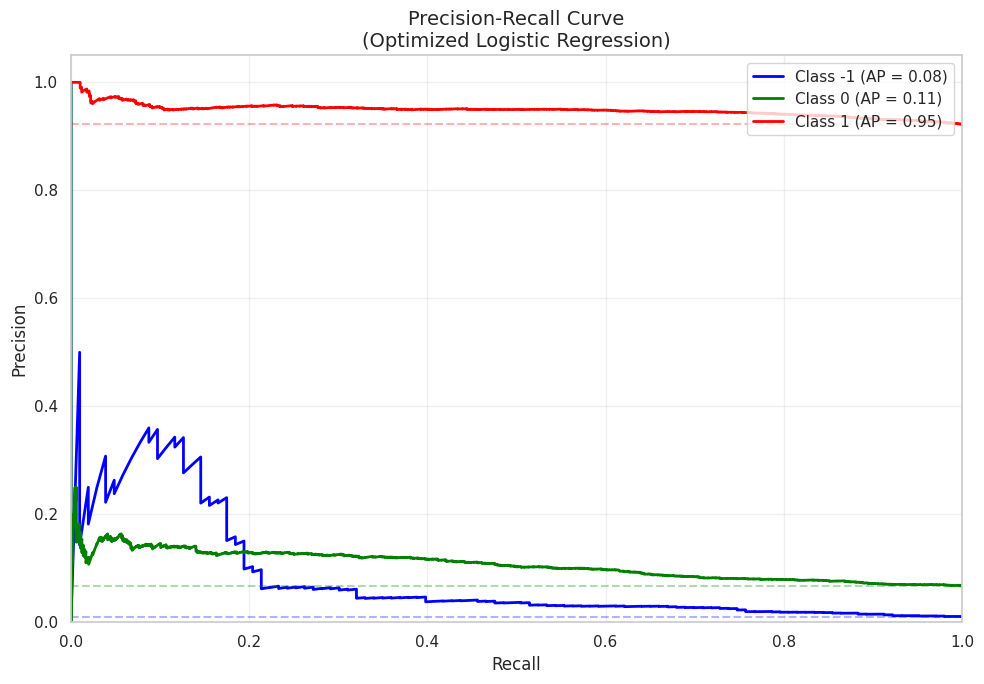

In [ ]:
import numpy as np
import pandas as pd

y_proba = best_log_reg.predict_proba(X_test_scaled)
prob_df = pd.DataFrame(y_proba, columns=best_log_reg.classes_)
prob_df['True_Class'] = y_test.reset_index(drop=True)

melted_df = prob_df.melt(id_vars='True_Class', var_name='Predicted_Class',
                         value_name='Probability')

plt.figure(figsize=(10, 6))
sns.boxplot(data=melted_df, x='Predicted_Class', y='Probability', hue='True_Class')
plt.title('Class Probability Distributions by True Class')
plt.legend(title='True Class')
plt.grid(True, alpha=0.3)
plt.show()

# predicting on 2023

In [ ]:
X_2023_scaled = scaler.transform(tfidf_df_2023)
df_2023["predicted_sentiment"] = best_log_reg.predict(X_2023_scaled)

In [ ]:
df_2022['predicted_sentiment'] = y_pred_2022

# Exporting csvs

In [ ]:
df_2021.to_csv("sentiment_reviews_2021.csv", index=False)
df_2022.to_csv("sentiment_reviews_2022.csv", index=False)
df_2023.to_csv("sentiment_predictions_2023.csv", index=False)

In [ ]:
from google.colab import files

files.download("sentiment_reviews_2021.csv")
files.download("sentiment_reviews_2022.csv")
files.download("sentiment_predictions_2023.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Save and download model

In [ ]:
import joblib
joblib.dump(best_log_reg, 'logistic_sentiment_model.pkl')


['logistic_sentiment_model.pkl']

In [ ]:
files.download('logistic_sentiment_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>